In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
names_dir = 'C:/Users/Super/Desktop/FALL22_DS/baby_names/'
names_data_list = []
names_columns = ['state', 'gender', 'year', 'name', 'babies']
for file in os.listdir(names_dir):
    if file.endswith('.TXT'):
        names_data = pd.read_csv(names_dir + file, header=None, names = names_columns)
        names_data_list.append(names_data)
    else:
        continue
names_data = pd.concat(names_data_list)

In [3]:
data = names_data[names_data['year'] >= 1950]

In [4]:
data.head(2)

,state,gender,year,name,babies
1269,AK,F,1950,Mary,71
1270,AK,F,1950,Linda,68


In [5]:
data.groupby('gender')['babies'].sum() / data['babies'].sum()

gender
F    0.470011
M    0.529989
Name: babies, dtype: float64

In [6]:
total_babies = data.babies.sum()
female_percent = data[data.gender == 'F']

In [7]:
most_popular_names = (data.groupby(['name', 'gender']).babies.sum().reset_index().sort_values('babies', ascending = False))

In [8]:
most_popular_names[:20]

,name,gender,babies
21483,Michael,M,3918662
13220,James,M,2902195
7440,David,M,2899746
14681,John,M,2755438
25319,Robert,M,2583575
30987,William,M,2141116
6137,Christopher,M,2023532
14927,Joseph,M,1714987
7131,Daniel,M,1704286
20916,Matthew,M,1592315


In [9]:
unique_names_per_gender = (data.groupby(['year', 'gender']).name.nunique().unstack())

In [10]:
unique_names_per_gender.head()

gender,F,M
year,,
1950,2112,1721
1951,2173,1735
1952,2210,1763
1953,2269,1757
1954,2300,1755


In [11]:
total_babies = data.babies.sum()
female_percent = data[data.gender == 'F']['babies'].sum()/total_babies
male_percent = data[data.gender == 'M']['babies'].sum()/ total_babies

In [12]:
female_percent

0.4700112923207223

In [13]:
unique_names_per_gender.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1950 to 2021
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   F       72 non-null     int64
 1   M       72 non-null     int64
dtypes: int64(2)
memory usage: 1.7 KB


<AxesSubplot:xlabel='year'>

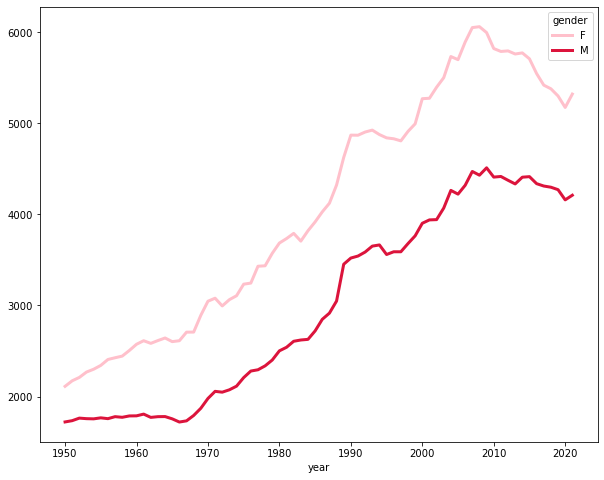

In [17]:
unique_names_per_gender.plot(figsize = (10,8), lw=3, color=['pink', 'crimson'])

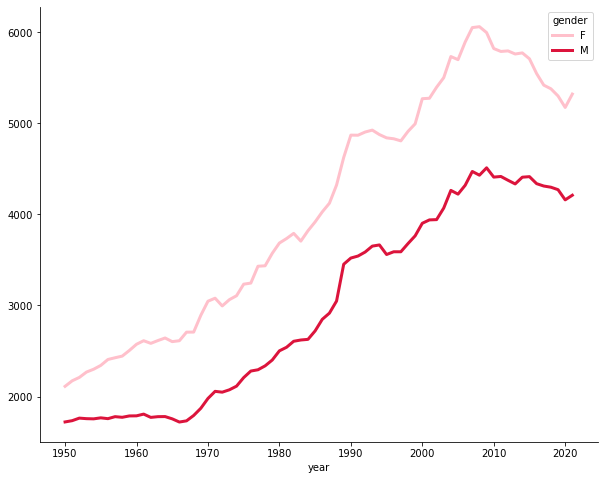

In [18]:
unique_names_per_gender.plot(figsize = (10,8), lw=3, color=['pink', 'crimson'])
sns.despine()

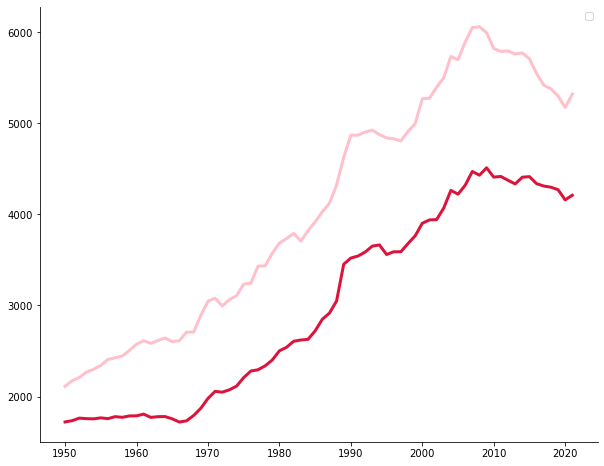

In [19]:
unique_names_per_gender.plot(figsize = (10,8), lw=3, color=['pink', 'crimson'])
sns.despine()
plt.xlabel('')
plt.legend([])

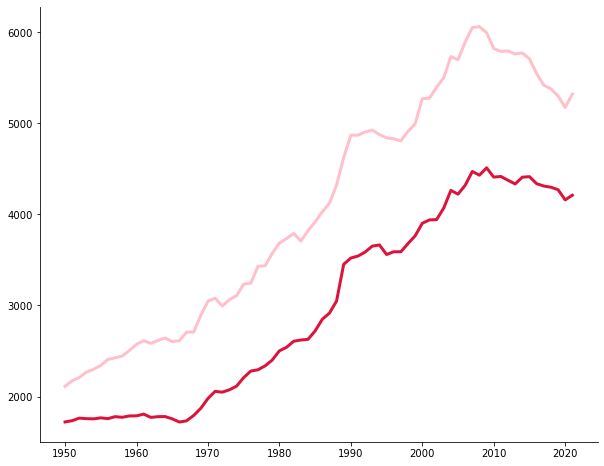

In [20]:
unique_names_per_gender.plot(figsize = (10,8), lw=3, color=['pink', 'crimson'])
plt.legend([],frameon = False)
plt.xlabel('')
sns.despine()

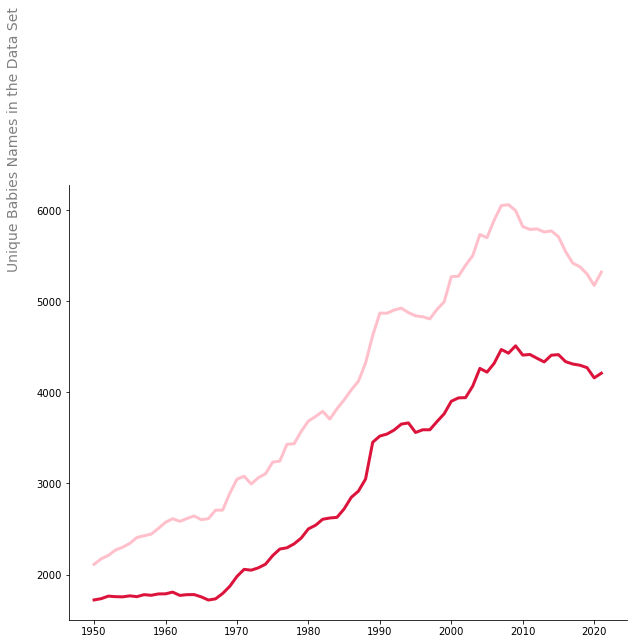

In [21]:
unique_names_per_gender.plot(figsize = (10,8), lw=3, color=['pink', 'crimson'])
plt.legend([],frameon = False)
plt.xlabel('')
sns.despine()
plt.ylabel('Unique Babies Names in the Data Set', position = (-1,0.8), ha = 'left', labelpad = 15, fontsize = 14, color = 'gray');

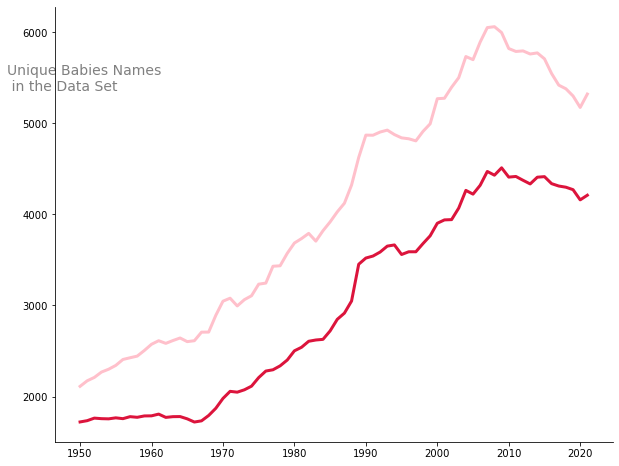

In [23]:
unique_names_per_gender.plot(figsize = (10,8), lw=3, color=['pink', 'crimson'])
plt.legend([],frameon = False)
plt.xlabel('')
sns.despine()
plt.ylabel('Unique Babies Names \n in the Data Set', position = (-1,0.8), rotation = 0, ha = 'left', labelpad = 15, fontsize = 14, color = 'gray');

Text(2022, 4200, 'Male')

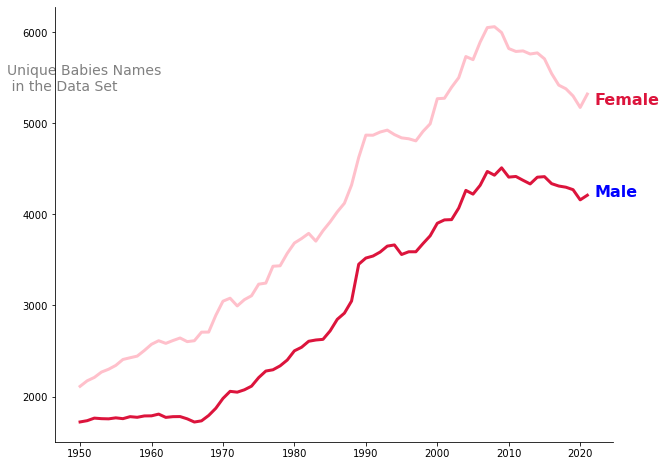

In [24]:
unique_names_per_gender.plot(figsize = (10,8), lw=3, color=['pink', 'crimson'])
plt.legend([],frameon = False)
plt.xlabel('')
sns.despine()
plt.ylabel('Unique Babies Names \n in the Data Set', position = (-1,0.8), rotation = 0, ha = 'left', labelpad = 15, fontsize = 14, color = 'gray');
plt.text(2022,5200,'Female', color='crimson',fontsize=16, fontweight = 'bold')
plt.text(2022,4200, 'Male', color = 'blue',fontsize=16, fontweight = 'bold')

Text(2022, 4000, '53% of babies')

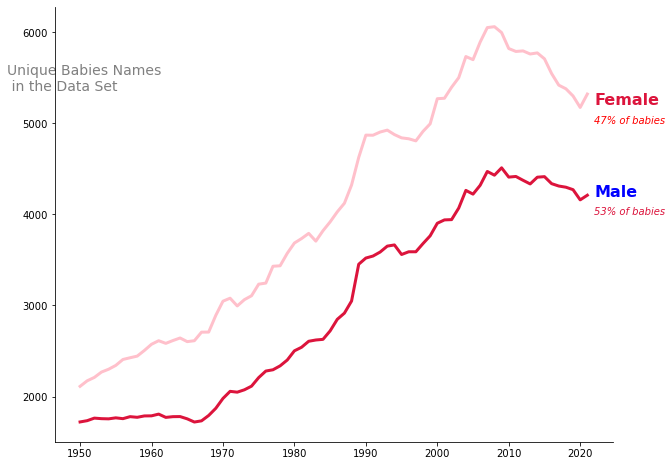

In [27]:
unique_names_per_gender.plot(figsize = (10,8), lw=3, color=['pink', 'crimson'])
plt.legend([],frameon = False)
plt.xlabel('')
sns.despine()
plt.ylabel('Unique Babies Names \n in the Data Set', position = (-1,0.8), rotation = 0, ha = 'left', labelpad = 15, fontsize = 14, color = 'gray');
plt.text(2022,5200,'Female', color='crimson',fontsize=16, fontweight = 'bold')
plt.text(2022,4200, 'Male', color = 'blue',fontsize=16, fontweight = 'bold')
plt.text(2022,5000, f'{female_percent*100:.0f}% of babies', fontstyle = 'italic', color = 'red')
plt.text(2022, 4000, f'{male_percent*100:.0f}% of babies',fontstyle = 'italic', color = 'crimson')